In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pylab as plt
import raytracing as rt

In [83]:
def plot_rectangle(uv, color=None, rectangle_size=None, title='rectangle'):
    color = np.zeros(uv.shape[0], dtype=bool) if color is None else color
    
    plt.plot(uv[color==0, 0], uv[color==0, 1], ',k', alpha=0.5) # outside
    plt.plot(uv[color==1, 0], uv[color==1, 1], ',r', alpha=0.6) # insed
    plt.plot(uv[color==2, 0], uv[color==2, 1], ',m', alpha=0.8) # insed
    
    if rectangle_size:
        width, height = rectangle_size
        plt.plot([-width/2, width/2, width/2, -width/2, -width/2],
                 [-height/2, -height/2, height/2, height/2, -height/2], '-',
                  color='black', linewidth=1);
    else:
        plt.axvline(x=0, linewidth=1, color='black')
        plt.axhline(y=0, linewidth=1, color='black')
    #plt.axis('equal');
    plt.xlabel('u (mm)'); plt.ylabel('v (mm)')
    plt.title(title);
    
    

# diffract

    # Parameters
     - Incident beam, source & optique
         A: beam size --> distribution
         u: divergence --> distribution
         lambda: energy --> distribution
     - Sample (perfect powder)
         size: height, width
         d(hkl) --> distribution / discrete
         (absorption, grain size, monocristal...)
     - Diffraction
         gamma (relative to lab. XZ plane) --> distribution
     - Detecteur
         geometry: slit width and height, offset

    # Gonio movements, scan, measure:
     - sample stage: omega, phi, psi, X, Y, Z
     - detecteur position: 2theta
     
     # Variables

- x, y, source
     - 

644


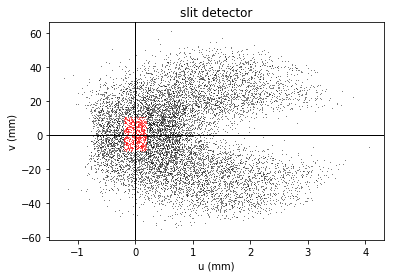

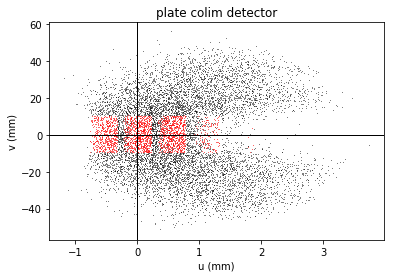

In [97]:
sample_position = {
    'omega':0, 'psi':0, 'phi':0,  # degree
    'X':0, 'Y':0, 'Z':0, # mm
}

hybride_colim_params = {
    'width':1.5,
    'height':10,
    'divergence_z':1/100,
    'divergence_y':1,
    'position':130
}

sample_params = {
    'width': 5, # mm
    'height': 5, # mm
    'deuxtheta_diff': 45, # degree
    'gamma_range':20, # degree
}

plate_collimator_params = {
    'distance':290, # mm, distance from gonio center to receving slit
    'offset':0, # mm, offset along Z
    'length':96, # mm
    'width':22,
    'height':20,
    'nbr_plates':39,
    'acceptance':0.27 # degree
}


slit_angle = 0.25
slit_conversion_distance = 90 # mm
slit_width = slit_conversion_distance*slit_angle *np.pi/180 # mm
    
slit_detector_params = {
    'distance':320, # mm, distance from gonio center to receving slit
    'offset':0, # mm, offset along Z
    'width':slit_width, # mm
    'height':20, # mm
}

# Experiment
N = 20000  # number of rays
deuxtheta = 40.
sample_position['omega'] = deuxtheta/2
sample_params['deuxtheta_diff'] = 40

# Source
A, u = rt.source(N, **hybride_colim_params)

# Diffraction
B, d, throught_sample, uv_sample = rt.planar_powder(A, u,
                                                   **sample_position,
                                                   **sample_params)

# Detector
through_detect, uv_detec = rt.slit_detector(B, d, deuxtheta,
                                     **slit_detector_params)

detected = np.logical_and(throught_sample, through_detect)
I = np.count_nonzero(detected)
print(I)

# Graph
plt.figure();
color = 3*throught_sample.astype(int) + through_detect.astype(int)
plot_rectangle(uv_detec, color=color, title='slit detector')

through_detect, uv_detec = rt.plate_collim_detector(B, d, deuxtheta,
                                             **plate_collimator_params)
plt.figure();
color = 3*throught_sample.astype(int) + through_detect.astype(int)
plot_rectangle(uv_detec, color=color, title='plate colim detector')

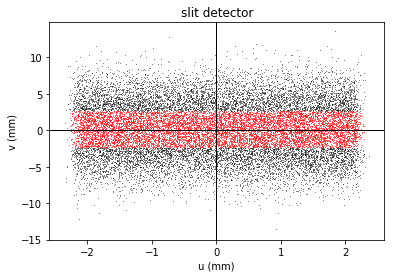

In [91]:
plt.figure();
color = throught_sample.astype(int) 
plot_rectangle(uv_sample, color=color, title='slit detector')

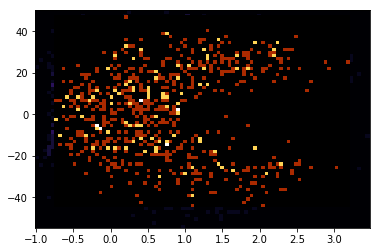

In [89]:
H, xedges, yedges = np.histogram2d(uv_detec[:, 0], uv_detec[:, 1],
                                   bins=[80, 60], density=True)

#ax = fig.add_subplot(132, title='pcolormesh: actual edges',
#        aspect='equal')
#plt.figure(figsize=(2, 20))
X, Y = np.meshgrid(xedges, yedges)
plt.pcolormesh(X, Y, H.T, cmap='magma');
#plt.axis('equal');

#plt.axis('equal');

H, xedges, yedges = np.histogram2d(uv_detec[through, 0], uv_detec[through, 1],
                                   bins=[80, 60], density=True)

#ax = fig.add_subplot(132, title='pcolormesh: actual edges',
#        aspect='equal')
#plt.figure(figsize=(2, 20))
X, Y = np.meshgrid(xedges, yedges)
plt.pcolormesh(X, Y, H.T, cmap='afmhot');

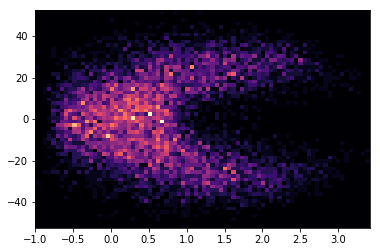

In [66]:
H, xedges, yedges = np.histogram2d(uv_detec[:, 0], uv_detec[:, 1],
                                   bins=[80, 60], density=True)

#ax = fig.add_subplot(132, title='pcolormesh: actual edges',
#        aspect='equal')
#plt.figure(figsize=(2, 20))
X, Y = np.meshgrid(xedges, yedges)
plt.pcolormesh(X, Y, H.T, cmap='magma');
#plt.axis('equal');

In [114]:
# Experiment
N = 100000  # number of rays
deuxtheta_center = 30.
deuxtheta_range = 1
nbr_points = 71

deuxtheta_span = np.linspace(deuxtheta_center - deuxtheta_range/2,
                             deuxtheta_center + deuxtheta_range/2, nbr_points)

sample_params['deuxtheta_diff'] = deuxtheta_center
I_measure = []
for deuxtheta in deuxtheta_span:
    sample_position['omega'] = deuxtheta/2
    
    # Source
    A, u = rt.source(N, **hybride_colim_params)

    # Diffraction
    B, d, throught_sample, uv_sample = rt.planar_powder(A, u,
                                                       **sample_position,
                                                       **sample_params)

    # Detector
    through_detect, uv_detec = rt.slit_detector(B, d, deuxtheta,
                                         **slit_detector_params)

    detected = np.logical_and(throught_sample, through_detect)
    I = np.count_nonzero(detected)
    I_measure.append(I)

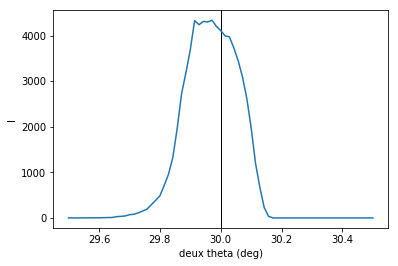

In [115]:
# Graph
plt.axvline(x=deuxtheta_center, linewidth=1, color='black')
plt.plot(deuxtheta_span, I_measure);
plt.xlabel('deux theta (deg)');
plt.ylabel('I');

# Draft

In [ ]:
plot_rectangle(uv_sample, lost=lost_at_sample, title='sample')

In [ ]:
plot_rectangle(uv_detec, lost=~through, title='detector')

In [45]:
I = np.count_nonzero(through)

In [33]:
I

1678

In [278]:
def faisceau_direct(deuxtheta_deg):
    # Gonio
    omega, psi, phi = deuxtheta_deg/2, 0, 0 # deg, sample stage orientation
    X, Y, Z = 0, 0, 0 # mm, sample stage position

    deuxtheta = deuxtheta_deg *np.pi/180  # rad, detector position

    gonio_radius = 360 # mm, distance center to detector slit

    # sample
    #sample_size = 120, 120  # mm, width, height
    #deuxtheta_diff = 54 *np.pi/180  # rad, diffraction angle (d_hkl)

    # incident beam
    N = 10000

    # Source
    A, u = hybride_colim(N)
    
    
    gamma = np.pi/9 * (np.random.rand(N,) - 0.5)

    # Diffraction
    #angles = np.pi/180*np.array([omega, psi, phi])
    #B, d, lost_at_sample, uv_sample = planar_powder(A, u,
    #                     angles, (X, Y, Z), sample_size,
    #                     gamma, deuxtheta_diff)

    # Detector
    width, height = 90*1/4. *np.pi/180, 20 # mm

    angles = (deuxtheta + np.pi/2, 0, 0) # i.e. omega, phi, psi
    offset = (0, 0, -gonio_radius)

    lost_detect, uv_detector, C = rt.rectangle_intersection(A, u,
                                                         angles, offset,
                                                         width, height)

    lost = lost_detect

    # sum
    I = np.sum(~lost)
    return I

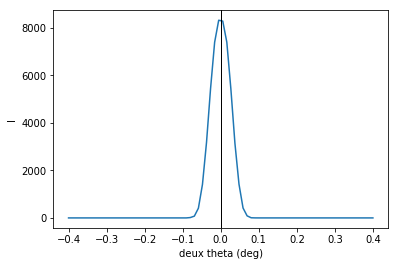

In [279]:
dt_range = 0.8
deuxtheta = 0
deuxtheta_span = np.linspace(-dt_range/2+deuxtheta,
                             +dt_range/2+deuxtheta, 76)
I = [faisceau_direct(dt) for dt in deuxtheta_span]

plt.plot(deuxtheta_span, I);
plt.axvline(x=deuxtheta, linewidth=1, color='black')
plt.xlabel('deux theta (deg)');
plt.ylabel('I');

In [268]:
def th_2theta_powder(deuxtheta_deg, deuxtheta_diff_deg):
    # Gonio
    omega, psi, phi = deuxtheta_deg/2, 60, 0 # deg, sample stage orientation
    X, Y, Z = 0, 0, 0 # mm, sample stage position

    deuxtheta = deuxtheta_deg *np.pi/180  # rad, detector position

    gonio_radius = 360 # mm, distance center to detector slit

    # sample
    sample_size = 50, 50  # mm, width, height
    deuxtheta_diff = deuxtheta_diff_deg *np.pi/180  # rad, diffraction angle (d_hkl)

    # incident beam
    N = 30000

    # Source
    A, u = hybride_colim(N)
    
    
    gamma = np.pi/9 * (np.random.rand(N,) - 0.5)

    # Diffraction
    angles = np.pi/180*np.array([omega, psi, phi])
    B, d, lost_at_sample, uv_sample = rt.planar_powder(A, u,
                         angles, (X, Y, Z), sample_size,
                         gamma, deuxtheta_diff)

    # Detector
    width, height = 90*1/4. *np.pi/180, 20 # mm

    angles = (deuxtheta + np.pi/2, 0, 0) # i.e. omega, phi, psi
    offset = (0, 0, -gonio_radius)

    lost_detect, uv_detector, C = rt.rectangle_intersection(B, d,
                                                         angles, offset,
                                                         width, height)

    lost = lost_detect + lost_at_sample

    # sum
    I = np.sum(~lost)
    return I

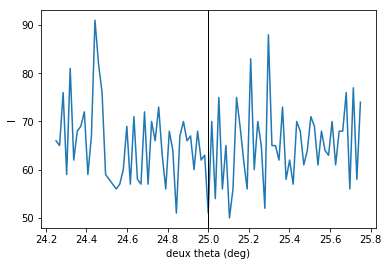

In [269]:
dt_range = 1.5
deuxtheta = 25
deuxtheta_span = np.linspace(-dt_range/2+deuxtheta,
                             +dt_range/2+deuxtheta, 87)
I = [th_2theta_powder(dt, deuxtheta) for dt in deuxtheta_span]

plt.plot(deuxtheta_span, I);
plt.axvline(x=deuxtheta, linewidth=1, color='black')
plt.xlabel('deux theta (deg)');
plt.ylabel('I');

In [270]:
deuxtheta_deg = 25
deuxtheta_diff_deg = deuxtheta_deg

omega, psi, phi = deuxtheta_deg/2, 60, 0 # deg, sample stage orientation
X, Y, Z = 0, 0, 0 # mm, sample stage position

deuxtheta = deuxtheta_deg *np.pi/180  # rad, detector position

gonio_radius = 360 # mm, distance center to detector slit

# sample
sample_size = 12, 10  # mm, width, height
deuxtheta_diff = deuxtheta_diff_deg *np.pi/180  # rad, diffraction angle (d_hkl)

# incident beam
N = 1000

# Source
A, u = hybride_colim(N)


gamma = np.pi/9 * (np.random.rand(N,) - 0.5)

# Diffraction
angles = np.pi/180*np.array([omega, psi, phi])
B, d, lost_at_sample, uv_sample = rt.planar_powder(A, u,
                     angles, (X, Y, Z), sample_size,
                     gamma, deuxtheta_diff)

# Detector
width, height = 90*1/4. *np.pi/180, 20 # mm

angles = (deuxtheta + np.pi/2, 0, 0) # i.e. omega, phi, psi
offset = (0, 0, -gonio_radius)

lost_detect, uv_detector, C = rt.rectangle_intersection(B, d,
                                                     angles, offset,
                                                     width, height)

lost = lost_detect + lost_at_sample

# sum
I = np.sum(~lost)
print(I)

1


In [271]:
length = 95 # mm
position = 230 # mm, front face from gonio center
gap_width = 0.4 # mm
height = 20 # mm
width = 20 # mm
nbr_lames = 50
general_offset = 0.1 # mm

period = width/nbr_lames

through_plates = 0
for k in range(nbr_lames):
    offset_x = -width/2 + k*period - general_offset
    
    offset = (offset_x, 0, -position)
    through_front = ~rt.rectangle_intersection(B, d,
                                         angles, offset,
                                         gap_width, height)[0]
    offset = (offset_x, 0, -position-length)
    through_back = ~rt.rectangle_intersection(B, d,
                                         angles, offset,
                                         gap_width, height)[0]
    
    through_k = np.logical_and(through_front, through_back)
    
    through_plates += np.count_nonzero(through_k)    
through_plates

107

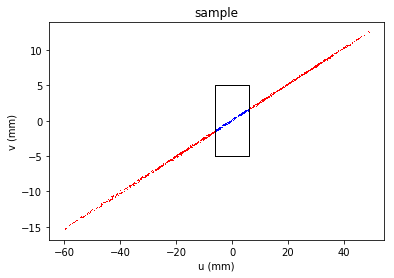

In [94]:
plot_rectangle(uv_sample, lost_at_sample, sample_size, title='sample')

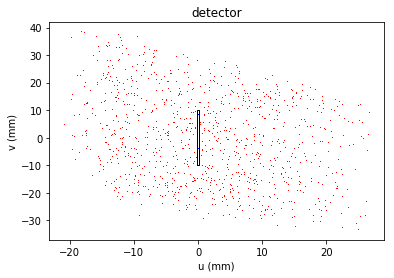

In [95]:
plot_rectangle(uv_detector, lost_detect, (width, height), title='detector')

In [59]:
x = np.vstack([A[:, 0], B[:, 0], C[:, 0]])
y = np.vstack([A[:, 2], B[:, 2], C[:, 2]])

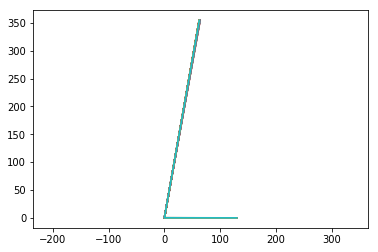

In [60]:
plt.plot(x, y);
plt.axis('equal');

In [107]:
a, b = 1, a

In [108]:
a, b

(1, 1)

In [288]:
length = 95 # mm
position = 230 # mm, front face from gonio center
gap_width = 0.4 # mm
height = 20 # mm
width = 20 # mm
nbr_lames = 50
general_offset = 0.1 # mm

period = width/nbr_lames

through_plates = 0
for k in range(nbr_lames):
    offset_x = -width/2 + k*period - general_offset
    
    offset = (offset_x, 0, -position)
    through_front = ~rt.rectangle_intersection(B, d,
                                         angles, offset,
                                         gap_width, height)[0]
    offset = (offset_x, 0, -position-length)
    through_back = ~rt.rectangle_intersection(B, d,
                                         angles, offset,
                                         gap_width, height)[0]
    
    through_k = np.logical_and(through_front, through_back)
    
    through_plates += np.count_nonzero(through_k)    
through_plates

107

In [315]:
def plate_collimator(A, u, angles, offset,
                     length=96, width=22, height=20,
                     nbr_plates=39, acceptance=0.27):
    '''Plate collimator
        
        acceptance in degree, half-angle
        
        origin is defined as center of the front surface
    '''
    gap_width = np.tan(acceptance *np.pi/180)*length
    period = width/(nbr_plates + 1)
    
    A_prime, u_prime = rt.change_base(A, u, angles, offset)

    time_to_front_plane = -np.divide(A_prime[:, 2], u_prime[:, 2],
                               where=u_prime[:, 2] < 0)

    time_to_back_plane = -np.divide(A_prime[:, 2] - length, u_prime[:, 2],
                               where=u_prime[:, 2] < 0)
    
    front_plane_uv = A_prime[:, 0:2] + time_to_front_plane[:, np.newaxis]*u_prime[:, 0:2]
    back_plane_uv = A_prime[:, 0:2] + time_to_back_plane[:, np.newaxis]*u_prime[:, 0:2]

    #through = time_to_front_plane > 0
    through = np.zeros((A.shape[0],), dtype=bool)
    for k in range(nbr_lames+1):
        x_center = -width/2 + k*period + 0.12
        
        through_front = np.abs(front_plane_uv[:, 0]-x_center) < gap_width/2
        through_back =  np.abs(back_plane_uv[:, 0]-x_center) < gap_width/2
        through_k = np.logical_and(through_front, through_back)
        
        through = np.logical_or(through, through_k)
        
    # vertical    
    through = np.logical_and(through, np.abs(front_plane_uv[:, 1]) < height/2 )
    through = np.logical_and(through, np.abs(back_plane_uv[:, 1]) < height/2 )
    return through

In [318]:
hybride_colim = Source(0.2, 20, np.pi/180/100, 1*np.pi/180, 130) 

def faisceau_direct(deuxtheta_deg):
    # Gonio
    omega, psi, phi = deuxtheta_deg/2, 0, 0 # deg, sample stage orientation
    X, Y, Z = 0, 0, 0 # mm, sample stage position

    deuxtheta = deuxtheta_deg *np.pi/180  # rad, detector position

    gonio_radius = 320 # mm, distance center to detector slit

    # incident beam
    N = 20000

    # Source
    A, u = hybride_colim(N)
    
    # Detector

    angles = (deuxtheta + np.pi/2, 0, 0) # i.e. omega, phi, psi
    offset = (0, 0, -gonio_radius)

    through_detect = plate_collimator(A, u,
                                       angles, offset)


    return np.count_nonzero(through_detect)

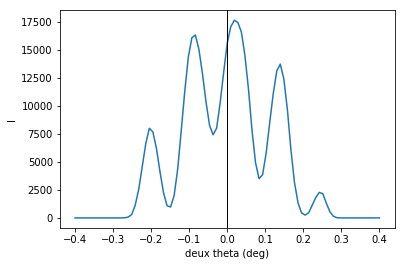

In [319]:
dt_range = -0.8
deuxtheta = 0
deuxtheta_span = np.linspace(-dt_range/2+deuxtheta,
                             +dt_range/2+deuxtheta, 87)
I = [faisceau_direct(dt) for dt in deuxtheta_span]

plt.plot(deuxtheta_span, I);
plt.axvline(x=deuxtheta, linewidth=1, color='black')
plt.xlabel('deux theta (deg)');
plt.ylabel('I');

In [302]:
acceptance = 0.27 *np.pi/180  # demi angle
L = 96 # mm
h = 0.1 # mm, plate thickness
gap = L*np.tan(acceptance)

In [251]:
20/40

0.5

In [254]:
(gap + 0.1)*39

21.54331494215773

In [ ]:
params = {
    'source_width': 0.2,
    'source_divergence':
}

In [14]:
plate_collimator_params = {
    'detector_angle':0, # deux-theta, deg
    'detector_distance':280, # mm, distance from gonio center to receving slit
    'detector_offset':0, # mm, offset along Z
    'length':96, # mm
    'detector_width':22,
    'detector_height':20,
    'nbr_plates':39,
    'detector_acceptance':0.27 # degree
}

slit_detector_params = {
    'detector_angle':0, # deux-theta, deg
    'detector_distance':280, # mm, distance from gonio center to receving slit
    'detector_offset':0, # mm, offset along Z
    'detector_slit_angle':22, # deg,
    'slit_conversion_distance': 90, #mm
    'detector_height':20 # mm
}